In [1]:
from model_han import *
from data_loader_han import * 
from data_process_han import *
from test_module_han import *
from train_han import * 
from utils_han import *
import seaborn as sns
import pickle
import random
from datetime import datetime

In [2]:
with open('df_in.pkl', 'rb') as file:
    df_in1 = pickle.load(file)

df_train, df_test = train_test_split(df_in1)

train_size:
 1    2700
0    2700
Name: polarity, dtype: int64
test_size:
 1    300
0    300
Name: polarity, dtype: int64


In [3]:
params_dict = {}

params_dict['embed_dim'] = 100
params_dict['word_gru_h_dim'] = 100
params_dict['sent_gru_h_dim'] = 100
params_dict['word_gru_n_layers'] = 2
params_dict['sent_gru_n_layers'] = 2
params_dict['word_att_dim'] = 200
params_dict['sent_att_dim'] = 200
params_dict['dropgru_s'] = 0.2 
params_dict['dropgru_w'] = 0.2
params_dict['dropval'] = 0.2

params_dict['tan_a'] = 0.5
params_dict['alpha_de'] = 0.5
params_dict['beta_de'] = 1

params_dict['batch_size'] = 30

params_dict['fc1'] = 100
params_dict['fc2'] = 20
params_dict['drop_fc'] = 0.3
params_dict['fc'] = create_fc(params_dict['fc1'],
                              params_dict['fc2'], params_dict['drop_fc'])
params_dict['epochs'] = 20 
params_dict['output_size'] = 1 
params_dict['lr'] = 7e-5
params_dict['print_every'] = 39
params_dict['clip_val'] = 1.5
params_dict['attention'] = 'de_attention'

#### experiment setting

In [4]:
fc1_lst = [100, 160, 200] 
fc2_lst = [15, 30] 
dropval_lst = [0.1, 0.4] 

criterion = nn.BCELoss()

#### 1. test softmax

In [9]:
params_dict['attention'] = 'softmax'

nn_softmax = []
scores_softmax = []

for fc1 in fc1_lst:
    params_dict['fc1'] = fc1
    
    for fc2 in fc2_lst:
        params_dict['fc2'] = fc2
        
        for dropval in dropval_lst:
            params_dict['drop_fc'] = dropval
            params_dict['fc'] = create_fc( params_dict['fc1'],
                                params_dict['fc2'],params_dict['drop_fc'])
            
            print('='*80)
            d_start = datetime.now() 
            best_score, classifier = do_training( df_in1, params_dict, criterion)
            nn_softmax.append(classifier)
            scores_softmax.append(best_score)
            print('BEST SCORE: ', best_score)
            print('TRAINING TOOK: ', ( datetime.now() - d_start ).seconds, ' s'  )

Start Training =======>
{'embed_dim': 100, 'word_gru_h_dim': 100, 'sent_gru_h_dim': 100, 'word_gru_n_layers': 2, 'sent_gru_n_layers': 2, 'word_att_dim': 200, 'sent_att_dim': 200, 'dropgru_s': 0.2, 'dropgru_w': 0.2, 'dropval': 0.2, 'tan_a': 0.5, 'alpha_de': 0.5, 'beta_de': 1, 'batch_size': 30, 'fc1': 100, 'fc2': 15, 'drop_fc': 0.1, 'fc': Sequential(
  (0): Dropout(p=0.1, inplace=False)
  (1): Linear(in_features=200, out_features=100, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=100, out_features=15, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=15, out_features=1, bias=True)
  (6): Sigmoid()
), 'epochs': 20, 'output_size': 1, 'lr': 7e-05, 'print_every': 39, 'clip_val': 1.5, 'attention': 'softmax'}
 ==> New best value..loss:0.6530902328399512 hm:0.6227720714204404
 ==> New best value..loss:0.6020962584477204 hm:0.6443930417603478
 ==> New best value..loss:0.5817971670856843 hm:0.686620683120366
 ==> New best value..loss:0.561680134

 ==> New best value..loss:0.5984147051159217 hm:0.6286383719033645
 ==> New best value..loss:0.5819223985380056 hm:0.6662856242285715
 ==> New best value..loss:0.5636214924101927 hm:0.7041059744715393
 ==> New best value..loss:0.5372360804859473 hm:0.7357826286828542
 ==> New best value..loss:0.5159118631664588 hm:0.743821276105155
 ==> New best value..loss:0.5117243114782839 hm:0.7454186972592636
 ==> New best value..loss:0.5113284052634726 hm:0.7505504423986272
 ==> New best value..loss:0.5048616668399499 hm:0.7523027551535798
 ==> New best value..loss:0.5021822470791486 hm:0.7552095358356561
 ==> New best value..loss:0.49838875811927175 hm:0.7589289318197187
 ==> New best value..loss:0.49616597136672663 hm:0.7607873947526075
 ==> New best value..loss:0.49054928580108953 hm:0.7663750397641844
 ==> New best value..loss:0.48933585140169883 hm:0.767085689084916
 ==> New best value..loss:0.48612719166035556 hm:0.7693666537579242
 ==> New best value..loss:0.48270112701824736 hm:0.77566524

 ==> New best value..loss:0.48568378944022983 hm:0.7765300640809573
 ==> New best value..loss:0.48552821488941417 hm:0.7813593242924094
 ==> New best value..loss:0.48326856014775293 hm:0.7827215670859899
 ==> New best value..loss:0.4798414309819539 hm:0.7892028900970851
 ==> New best value..loss:0.4769187809205523 hm:0.7896886103916986
 ==> New best value..loss:0.4686136730745727 hm:0.791618641223685
 ==> New best value..loss:0.4642084316880095 hm:0.7946813102026751
 ==> New best value..loss:0.4621594594974144 hm:0.8016286601762537
 ==> New best value..loss:0.45866869652972503 hm:0.8025085009145473
 ==> New best value..loss:0.4561673075545068 hm:0.805725276919759
 ==> New best value..loss:0.44582407147276637 hm:0.8086549088553687
 ==> New best value..loss:0.4454115766520594 hm:0.8086644415980321
 ==> New best value..loss:0.44106509288152057 hm:0.8116431096957152
 ==> New best value..loss:0.4405072050936082 hm:0.8150890234094936
 ==> New best value..loss:0.4306328921925788 hm:0.81984662

 ==> New best value..loss:0.4642558962691064 hm:0.8022794327648388
 ==> New best value..loss:0.4635326722088982 hm:0.8036705687402622
 ==> New best value..loss:0.4602990460162069 hm:0.8039899530860304
 ==> New best value..loss:0.4573768400678448 hm:0.8098461974705686
 ==> New best value..loss:0.4560995242174934 hm:0.8115788162745384
 ==> New best value..loss:0.45049624086595047 hm:0.8119576913224581
 ==> New best value..loss:0.44793426347713844 hm:0.8128241250796763
 ==> New best value..loss:0.446470847901176 hm:0.8130612128408634
 ==> New best value..loss:0.4459822429161446 hm:0.816442979303614
 ==> New best value..loss:0.4423145420995413 hm:0.8178335505525335
 ==> New best value..loss:0.4358934713344948 hm:0.8216294141857113
 ==> New best value..loss:0.4349305156399222 hm:0.8247132280117633
 ==> New best value..loss:0.43150214646376817 hm:0.8247811011881236
 ==> New best value..loss:0.4308576242012136 hm:0.8264072660188192
 ==> New best value..loss:0.42995215046639534 hm:0.8269387316

 ==> New best value..loss:0.6653191074728966 hm:0.6331857666679885
 ==> New best value..loss:0.5979626203576723 hm:0.6502835762885122
 ==> New best value..loss:0.5816616769880056 hm:0.6919041882968414
 ==> New best value..loss:0.5551579693953196 hm:0.7194168625461655
 ==> New best value..loss:0.5265154764056206 hm:0.746998098854891
 ==> New best value..loss:0.5205829069018364 hm:0.7498542558653251
 ==> New best value..loss:0.520446772997578 hm:0.7529414181173378
 ==> New best value..loss:0.5148810346921285 hm:0.7586474166380037
 ==> New best value..loss:0.5070524973173937 hm:0.7686409919366916
 ==> New best value..loss:0.5033651012927294 hm:0.7688564733885238
 ==> New best value..loss:0.49973851318160695 hm:0.7710348894543323
 ==> New best value..loss:0.49730021009842557 hm:0.7744536736874784
 ==> New best value..loss:0.49062127713114023 hm:0.7773388876722247
 ==> New best value..loss:0.49027921073138714 hm:0.7791913739148519
 ==> New best value..loss:0.48987832355002564 hm:0.780228282

 ==> New best value..loss:0.663026967048645 hm:0.6385019009360973
 ==> New best value..loss:0.5864562112092971 hm:0.6574620294875555
 ==> New best value..loss:0.5690643799304962 hm:0.7015497758860607
 ==> New best value..loss:0.5417865389585494 hm:0.7303227023696208
 ==> New best value..loss:0.5120329761505127 hm:0.7546193694865798
 ==> New best value..loss:0.5009598562121391 hm:0.7621923293798628
 ==> New best value..loss:0.49209857404232027 hm:0.768773780588451
 ==> New best value..loss:0.49144320011138914 hm:0.772790319336704
 ==> New best value..loss:0.4873995852470398 hm:0.7758647373755305
 ==> New best value..loss:0.4858922475576401 hm:0.7761697543903279
 ==> New best value..loss:0.48338143408298495 hm:0.777695752105049
 ==> New best value..loss:0.4833384996652603 hm:0.7786603211715579
 ==> New best value..loss:0.4802502989768982 hm:0.781349501615187
 ==> New best value..loss:0.47723802506923674 hm:0.7840469831508775
 ==> New best value..loss:0.47343736946582793 hm:0.787469696479

In [11]:
np.argmax( scores_softmax )

5

In [17]:
nn_softmax[5].encoder.params_dict

{'embed_dim': 100,
 'word_gru_h_dim': 100,
 'sent_gru_h_dim': 100,
 'word_gru_n_layers': 2,
 'sent_gru_n_layers': 2,
 'word_att_dim': 200,
 'sent_att_dim': 200,
 'dropgru_s': 0.2,
 'dropgru_w': 0.2,
 'dropval': 0.2,
 'tan_a': 0.5,
 'alpha_de': 0.5,
 'beta_de': 1,
 'batch_size': 30,
 'fc1': 200,
 'fc2': 30,
 'drop_fc': 0.4,
 'fc': Sequential(
   (0): Dropout(p=0.4, inplace=False)
   (1): Linear(in_features=200, out_features=200, bias=True)
   (2): Dropout(p=0.2, inplace=False)
   (3): Linear(in_features=200, out_features=30, bias=True)
   (4): Dropout(p=0.2, inplace=False)
   (5): Linear(in_features=30, out_features=1, bias=True)
   (6): Sigmoid()
 ),
 'epochs': 20,
 'output_size': 1,
 'lr': 7e-05,
 'print_every': 39,
 'clip_val': 1.5,
 'attention': 'softmax'}

In [ ]:
fc1 = 200, fc2 = 30, drop_fc = 0.4

#### 2. test tanh

In [18]:
params_dict['attention'] = 'tanh'

params_dict['epochs'] = 30 
params_dict['print_every'] = 19

params_dict['fc1'] = 200
params_dict['fc2'] = 30
params_dict['drop_fc'] = 0.4
params_dict['fc'] = create_fc( params_dict['fc1'],
                    params_dict['fc2'],params_dict['drop_fc'])
        

alpha_lst = [1, 0.5, 0.05]
lr_lst = [7e-5, 7e-6]
bs_lst = [30, 50]

nn_tanh= []
scores_tanh = []

for lr in lr_lst:
    params_dict['lr'] = lr
    
    for bs in bs_lst:
        params_dict['batch_size'] = bs

        for alpha in alpha_lst:
            params_dict['tan_a'] = alpha

            print('='*80)
            print('alpha:', alpha, 'bs', )
            d_start = datetime.now() 
            best_score, classifier = do_training( df_in1, params_dict, criterion)
            nn_tanh.append(classifier)
            scores_tanh.append(best_score)

            print('BEST SCORE: ', best_score)
            print('TRAINING TOOK: ', ( datetime.now() - d_start ).seconds, ' s'  )

alpha: 1 bs
Start Training =======>
{'embed_dim': 100, 'word_gru_h_dim': 100, 'sent_gru_h_dim': 100, 'word_gru_n_layers': 2, 'sent_gru_n_layers': 2, 'word_att_dim': 200, 'sent_att_dim': 200, 'dropgru_s': 0.2, 'dropgru_w': 0.2, 'dropval': 0.2, 'tan_a': 1, 'alpha_de': 0.5, 'beta_de': 1, 'batch_size': 30, 'fc1': 200, 'fc2': 30, 'drop_fc': 0.4, 'fc': Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=200, out_features=200, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=200, out_features=30, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=30, out_features=1, bias=True)
  (6): Sigmoid()
), 'epochs': 30, 'output_size': 1, 'lr': 7e-05, 'print_every': 19, 'clip_val': 1.5, 'attention': 'tanh'}
 ==> New best value..loss:0.6664791834354401 hm:0.5878378834779499
 ==> New best value..loss:0.6296174311637879 hm:0.5965293112486563
 ==> New best value..loss:0.6165251219272614 hm:0.6182575276426481
 ==> New best value..loss:0.6

 ==> New best value..loss:0.7232798057443955 hm:0.3824529900708221
 ==> New best value..loss:0.6822634865255917 hm:0.525807043001758
 ==> New best value..loss:0.6422199969198189 hm:0.5882623832435938
 ==> New best value..loss:0.6339348858478022 hm:0.5981170302027651
 ==> New best value..loss:0.6276407656716365 hm:0.6094348814278819
 ==> New best value..loss:0.6188785556484672 hm:0.6225741125405987
 ==> New best value..loss:0.6101183938045128 hm:0.6382592116410082
 ==> New best value..loss:0.6030491724902508 hm:0.6517144503595111
 ==> New best value..loss:0.5978973805904388 hm:0.659599934222208
 ==> New best value..loss:0.593979559692682 hm:0.6660916419465391
 ==> New best value..loss:0.5930772347777498 hm:0.6705608953438214
 ==> New best value..loss:0.5908186932404836 hm:0.6792917365801264
 ==> New best value..loss:0.5867615283704272 hm:0.6833873030320333
 ==> New best value..loss:0.5775840212317074 hm:0.6959273482906183
 ==> New best value..loss:0.5746367123781466 hm:0.701022998250027

 ==> New best value..loss:0.648840396568693 hm:0.5876122786908373
 ==> New best value..loss:0.615687697098173 hm:0.6363070200644877
 ==> New best value..loss:0.5893647321339311 hm:0.6769949661458073
 ==> New best value..loss:0.5766269914035139 hm:0.6967923833600822
 ==> New best value..loss:0.5692527304435598 hm:0.7244783557615856
 ==> New best value..loss:0.5510093055922409 hm:0.7397859555383538
 ==> New best value..loss:0.5385761548732889 hm:0.7438699967606153
 ==> New best value..loss:0.5339270706834465 hm:0.7484599877110042
 ==> New best value..loss:0.528983814962979 hm:0.7545473195421284
 ==> New best value..loss:0.5252290018673601 hm:0.7549408497262333
 ==> New best value..loss:0.5200431603809883 hm:0.7579741941422851
 ==> New best value..loss:0.5143281241943096 hm:0.7590002718514739
 ==> New best value..loss:0.5132111968665287 hm:0.7633510682527794
 ==> New best value..loss:0.5062797275082819 hm:0.7660727896290908
 ==> New best value..loss:0.505086717934444 hm:0.7705972103802519

 ==> New best value..loss:0.5547122019529342 hm:0.7170247793737565
 ==> New best value..loss:0.5482956725358963 hm:0.7240858482981474
 ==> New best value..loss:0.5451044523715973 hm:0.7261402184184552
 ==> New best value..loss:0.5441886895895004 hm:0.7283016889065016
 ==> New best value..loss:0.5380273574590683 hm:0.7352364163346325
 ==> New best value..loss:0.5363202369213105 hm:0.7381879539205298
 ==> New best value..loss:0.533107727766037 hm:0.7411174599220953
 ==> New best value..loss:0.530920895934105 hm:0.7444233563312551
 ==> New best value..loss:0.5298384273052216 hm:0.7460405728493206
 ==> New best value..loss:0.5298167389631271 hm:0.7463652558971852
 ==> New best value..loss:0.5276361286640168 hm:0.7474631005293891
 ==> New best value..loss:0.5269643360376358 hm:0.7488410850982793
 ==> New best value..loss:0.523317312002182 hm:0.7501878508536345
 ==> New best value..loss:0.5228390502929687 hm:0.7506850283369486
 ==> New best value..loss:0.5216810929775239 hm:0.751327716717763

 ==> New best value..loss:0.6276988520914194 hm:0.5567581963608192
 ==> New best value..loss:0.6267333857867182 hm:0.5673119691339493
 ==> New best value..loss:0.6260517215242192 hm:0.5760937284822486
 ==> New best value..loss:0.6211165335713601 hm:0.5796048893907549
 ==> New best value..loss:0.6201267789821235 hm:0.5841859194394223
 ==> New best value..loss:0.6190491428180617 hm:0.5892771751446585
 ==> New best value..loss:0.6177925747268054 hm:0.5937824712796098
 ==> New best value..loss:0.616709019456591 hm:0.5984397307458954
 ==> New best value..loss:0.6156938209825632 hm:0.6017015353250754
 ==> New best value..loss:0.6142612561887625 hm:0.603047727414238
 ==> New best value..loss:0.6135754360228168 hm:0.6041028767180919
 ==> New best value..loss:0.6129688590156789 hm:0.6095346089528685
 ==> New best value..loss:0.6126526338713509 hm:0.6162396319872389
 ==> New best value..loss:0.6123486708621589 hm:0.6200442581711638
 ==> New best value..loss:0.6114269750458854 hm:0.62325025592189

 ==> New best value..loss:0.4932785289628165 hm:0.7772533243229985
 ==> New best value..loss:0.49306043921684733 hm:0.7779862823411358
 ==> New best value..loss:0.49216672413203183 hm:0.7785503614843162
 ==> New best value..loss:0.4904333012444632 hm:0.7787643770350225
 ==> New best value..loss:0.490157062910041 hm:0.7794391738617678
 ==> New best value..loss:0.4900599547794887 hm:0.7800227013546385
 ==> New best value..loss:0.4896466032582886 hm:0.7804510457605328
 ==> New best value..loss:0.48838090774964316 hm:0.7805043307279097
 ==> New best value..loss:0.48816825358235105 hm:0.7810541872273534
 ==> New best value..loss:0.48765527897951555 hm:0.7817013128918775
 ==> New best value..loss:0.486982737876931 hm:0.7827916264046467
 ==> New best value..loss:0.48620471358299255 hm:0.7842357087559381
 ==> New best value..loss:0.4861243592233074 hm:0.7845939564140071
 ==> New best value..loss:0.48564026002981225 hm:0.784915184907291
BEST SCORE:  0.784915184907291
TRAINING TOOK:  481  s
alph

 ==> New best value..loss:0.5292888495229906 hm:0.7307452349147441
 ==> New best value..loss:0.5274026326594814 hm:0.730975335835922
 ==> New best value..loss:0.5259808926813064 hm:0.7324666335682937
 ==> New best value..loss:0.5237509223722643 hm:0.733236165051303
 ==> New best value..loss:0.5226631020345995 hm:0.7342272165935702
 ==> New best value..loss:0.5183992933842444 hm:0.7345331504927083
 ==> New best value..loss:0.5179132434629625 hm:0.7382051635849037
 ==> New best value..loss:0.5175130367279053 hm:0.7392376939659852
 ==> New best value..loss:0.515199464175009 hm:0.7401151283792993
 ==> New best value..loss:0.5140825596547896 hm:0.7410368737997044
 ==> New best value..loss:0.5131816681354276 hm:0.7438220999904304
 ==> New best value..loss:0.5127527021592663 hm:0.744052538630957
 ==> New best value..loss:0.5102287386694262 hm:0.7448801881460936
 ==> New best value..loss:0.5098763848504713 hm:0.74511892728112
 ==> New best value..loss:0.5097091351785967 hm:0.7485131590178444
 

 ==> New best value..loss:0.5439172049363454 hm:0.7339652183312204
 ==> New best value..loss:0.5418542792399724 hm:0.7380138271040745
 ==> New best value..loss:0.5374140828847885 hm:0.7382444229990928
 ==> New best value..loss:0.5350431551535925 hm:0.7387800532551344
 ==> New best value..loss:0.5347143799066544 hm:0.7389524863406146
 ==> New best value..loss:0.5345651706059774 hm:0.7403051364646972
 ==> New best value..loss:0.5327365775903066 hm:0.7410033869670408
 ==> New best value..loss:0.5323325842618942 hm:0.741885936000431
 ==> New best value..loss:0.5321142146984736 hm:0.7420397775495922
 ==> New best value..loss:0.5311592052380244 hm:0.7422313629065803
 ==> New best value..loss:0.530291736125946 hm:0.7424523052687827
 ==> New best value..loss:0.5297740558783214 hm:0.742494479770574
 ==> New best value..loss:0.5284297317266464 hm:0.7446234057816955
 ==> New best value..loss:0.5264718184868494 hm:0.7448124514755204
 ==> New best value..loss:0.5262720435857773 hm:0.745311171945067

In [36]:
np.argsort(scores_tanh)

array([ 9, 10, 11,  8,  6,  7,  3,  1,  5,  4,  2,  0], dtype=int64)

#### 3. test de-attention

In [37]:
params_dict['attention'] = 'de_attention'

nn_deattention = []
scores_deattention = []

alpha_de_lst = [1, 0.5, 0.05]
beta_de_lst = [1, 0.5, 0.05]
lr_lst = [1e-4, 7e-5]

params_dict['batch_size'] = 30

for lr in lr_lst: 
    params_dict['lr'] = lr    
    
    for alpha_de in alpha_de_lst:
        params_dict['alpha_de'] = alpha_de

        for beta_de in beta_de_lst:
            params_dict['beta_de'] = beta_de 

            print('='*80)
            d_start = datetime.now() 
            best_score, classifier = do_training( df_in1, params_dict, criterion)
            nn_deattention.append(classifier)
            scores_deattention.append(best_score)

            print('BEST SCORE: ', best_score)
            print('TRAINING TOOK: ', ( datetime.now() - d_start ).seconds, ' s'  )

Start Training =======>
{'embed_dim': 100, 'word_gru_h_dim': 100, 'sent_gru_h_dim': 100, 'word_gru_n_layers': 2, 'sent_gru_n_layers': 2, 'word_att_dim': 200, 'sent_att_dim': 200, 'dropgru_s': 0.2, 'dropgru_w': 0.2, 'dropval': 0.2, 'tan_a': 0.05, 'alpha_de': 1, 'beta_de': 1, 'batch_size': 30, 'fc1': 200, 'fc2': 30, 'drop_fc': 0.4, 'fc': Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=200, out_features=200, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=200, out_features=30, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=30, out_features=1, bias=True)
  (6): Sigmoid()
), 'epochs': 30, 'output_size': 1, 'lr': 0.0001, 'print_every': 19, 'clip_val': 1.5, 'attention': 'de_attention'}
 ==> New best value..loss:0.6187478620178846 hm:0.582793437686237
 ==> New best value..loss:0.6075767375984971 hm:0.6120527624427844
 ==> New best value..loss:0.5969545464126431 hm:0.652552547068315
 ==> New best value..loss:0.59435

 ==> New best value..loss:0.613550102593852 hm:0.6044089609031805
 ==> New best value..loss:0.6116615884444293 hm:0.6731448505366545
 ==> New best value..loss:0.6027237971623739 hm:0.6770354899870906
 ==> New best value..loss:0.5862043686941558 hm:0.6781152260406227
 ==> New best value..loss:0.578347220140345 hm:0.6863044525468047
 ==> New best value..loss:0.5736643192814845 hm:0.6888243133367293
 ==> New best value..loss:0.5694618587400399 hm:0.6918407734053228
 ==> New best value..loss:0.562798311605173 hm:0.6965861960972253
 ==> New best value..loss:0.5578353679647633 hm:0.6994636033018661
 ==> New best value..loss:0.5567359801600961 hm:0.705568190382913
 ==> New best value..loss:0.5567174325971043 hm:0.7059622149830624
 ==> New best value..loss:0.5551821571939132 hm:0.7099460182936602
 ==> New best value..loss:0.54975579123871 hm:0.7130024625277165
 ==> New best value..loss:0.5481579882257125 hm:0.7132726271038293
 ==> New best value..loss:0.5463222060717788 hm:0.7151892811908257
 

 ==> New best value..loss:0.4915426493837283 hm:0.7643927879595057
 ==> New best value..loss:0.48961145889300567 hm:0.7657019144730779
 ==> New best value..loss:0.4860831338625688 hm:0.7678971583032422
 ==> New best value..loss:0.4827446026297716 hm:0.7718059190553199
 ==> New best value..loss:0.48230829949562365 hm:0.7726253244346873
BEST SCORE:  0.7726253244346873
TRAINING TOOK:  555  s
Start Training =======>
{'embed_dim': 100, 'word_gru_h_dim': 100, 'sent_gru_h_dim': 100, 'word_gru_n_layers': 2, 'sent_gru_n_layers': 2, 'word_att_dim': 200, 'sent_att_dim': 200, 'dropgru_s': 0.2, 'dropgru_w': 0.2, 'dropval': 0.2, 'tan_a': 0.05, 'alpha_de': 0.05, 'beta_de': 1, 'batch_size': 30, 'fc1': 200, 'fc2': 30, 'drop_fc': 0.4, 'fc': Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=200, out_features=200, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=200, out_features=30, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features

 ==> New best value..loss:0.5375837253836485 hm:0.7190166329448551
 ==> New best value..loss:0.536826932659516 hm:0.7214185680276752
 ==> New best value..loss:0.5341767886510262 hm:0.721862488494713
 ==> New best value..loss:0.5333187161729886 hm:0.7219428448982784
 ==> New best value..loss:0.5284135685517237 hm:0.7259034642677824
 ==> New best value..loss:0.5273823142051697 hm:0.7262171214686987
 ==> New best value..loss:0.5268515528967748 hm:0.7265244947614443
 ==> New best value..loss:0.5246145020310695 hm:0.7276755040966844
 ==> New best value..loss:0.5238546883830657 hm:0.7286185501633328
 ==> New best value..loss:0.5200646138535097 hm:0.7299409347415913
 ==> New best value..loss:0.5198436714708805 hm:0.7303436181071417
 ==> New best value..loss:0.5180088482224025 hm:0.7327990323745917
 ==> New best value..loss:0.5160361872269557 hm:0.7359619728656522
 ==> New best value..loss:0.5109162680231608 hm:0.7368764189853687
 ==> New best value..loss:0.5093016893817828 hm:0.74139797564439

 ==> New best value..loss:0.5911907577047161 hm:0.6304442926820454
 ==> New best value..loss:0.58684340820593 hm:0.6686098873396304
 ==> New best value..loss:0.5801714138657439 hm:0.6749808298897476
 ==> New best value..loss:0.5787744703246098 hm:0.6802785691097817
 ==> New best value..loss:0.5696338122966242 hm:0.6828592182861964
 ==> New best value..loss:0.56845082079663 hm:0.6884579387284943
 ==> New best value..loss:0.5630422205317254 hm:0.6966055994305942
 ==> New best value..loss:0.5554468783677793 hm:0.7021340268243257
 ==> New best value..loss:0.5527137664018893 hm:0.705216095903801
 ==> New best value..loss:0.5525000294049581 hm:0.7062887259799541
 ==> New best value..loss:0.5507882745826945 hm:0.7069786596146325
 ==> New best value..loss:0.5501721624065848 hm:0.7140779225267266
 ==> New best value..loss:0.5435029557522606 hm:0.7164532494143955
 ==> New best value..loss:0.541797127793817 hm:0.7205949870454352
 ==> New best value..loss:0.5378181688925799 hm:0.7220468911161922
 

 ==> New best value..loss:0.505802455842495 hm:0.7516053377629965
 ==> New best value..loss:0.5052155131101608 hm:0.7570744962403495
 ==> New best value..loss:0.5049281787872314 hm:0.7574267735721522
 ==> New best value..loss:0.5037231487035752 hm:0.7585834114601144
 ==> New best value..loss:0.5035664474964142 hm:0.7590138500387359
BEST SCORE:  0.7590138500387359
TRAINING TOOK:  543  s
Start Training =======>
{'embed_dim': 100, 'word_gru_h_dim': 100, 'sent_gru_h_dim': 100, 'word_gru_n_layers': 2, 'sent_gru_n_layers': 2, 'word_att_dim': 200, 'sent_att_dim': 200, 'dropgru_s': 0.2, 'dropgru_w': 0.2, 'dropval': 0.2, 'tan_a': 0.05, 'alpha_de': 0.5, 'beta_de': 0.05, 'batch_size': 30, 'fc1': 200, 'fc2': 30, 'drop_fc': 0.4, 'fc': Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=200, out_features=200, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=200, out_features=30, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=

 ==> New best value..loss:0.6173283194794374 hm:0.6319110501454002
 ==> New best value..loss:0.6161053916987251 hm:0.6346504385884927
 ==> New best value..loss:0.611694839070825 hm:0.6365247556132794
 ==> New best value..loss:0.6070449784690258 hm:0.6482174543943255
 ==> New best value..loss:0.5978666649145239 hm:0.6618523233351885
 ==> New best value..loss:0.5945307308552312 hm:0.6688939618356432
 ==> New best value..loss:0.5879619711754369 hm:0.671498769928214
 ==> New best value..loss:0.5808253755756453 hm:0.6831038552512255
 ==> New best value..loss:0.5735766700669831 hm:0.6839257609195633
 ==> New best value..loss:0.5706337491671244 hm:0.6877229954399505
 ==> New best value..loss:0.5698679784933726 hm:0.6890546838321376
 ==> New best value..loss:0.568306656444774 hm:0.6924146968240382
 ==> New best value..loss:0.5674521630885554 hm:0.6966853023715699
 ==> New best value..loss:0.5646897186251247 hm:0.69985043512728
 ==> New best value..loss:0.5626907050609589 hm:0.7003260829984173


In [ ]:
alpha = 1
beta = 0.5

# alpha = 0.5
# beta = 0.05

In [ ]:
np.argsort(scores_softmax)[::-1][:3]
np.argsort(scores_tanh)[::-1][:3]
np.argsort(scores_deattention)[::-1][ : 3]

In [121]:
params_dict['lr'] = 1e-4

## 1.Softmax attention

In [ ]:
params_dict['attention'] = 'softmax'
best_score, nn_soft = do_training( df_in1, params_dict, criterion)

Start Training =======>
{'embed_dim': 100, 'word_gru_h_dim': 100, 'sent_gru_h_dim': 100, 'word_gru_n_layers': 2, 'sent_gru_n_layers': 2, 'word_att_dim': 200, 'sent_att_dim': 200, 'dropgru_s': 0.2, 'dropgru_w': 0.2, 'dropval': 0.2, 'tan_a': 0.05, 'alpha_de': 0.05, 'beta_de': 0.05, 'batch_size': 30, 'fc1': 200, 'fc2': 30, 'drop_fc': 0.4, 'fc': Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=200, out_features=200, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=200, out_features=30, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=30, out_features=1, bias=True)
  (6): Sigmoid()
), 'epochs': 30, 'output_size': 1, 'lr': 0.0001, 'print_every': 19, 'clip_val': 1.5, 'attention': 'softmax'}
 ==> New best value..loss:0.5412338563040191 hm:0.730445521381458
 ==> New best value..loss:0.5218880918680453 hm:0.7528477105833071
 ==> New best value..loss:0.5055333042846006 hm:0.7657710690944849
 ==> New best value..loss:0.503

In [ ]:
nn_soft.to('cpu')
classifer.eval()
result, a_it, a_i, g_t = visualize_att(classifer, df_test, ind)

## 2. Tanh Attention

## 3. CoDA (Quasi- Attention)

#### test module 확인

In [114]:
# classifer = nn_deattention[10]
# classifer.to('cpu')
# classifer.eval()

In [81]:
ind = random.randint(0, len(df_test))
print(ind)
df_test['sent_org'][ind] 

442


In [82]:


# 442
# ['봄이랑 어울리는 색이에요', '당근과 단감의 중간색 착색 핑크가 아니라 주황색입니다', '추천 해요']

# 

['봄이랑 어울리는 색이에요', '당근과 단감의 중간색 착색 핑크가 아니라 주황색입니다', '추천 해요']

Ground Truth: 1, 
Predicted: 0.493


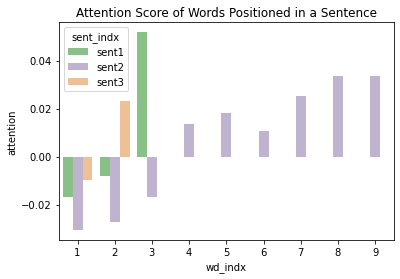

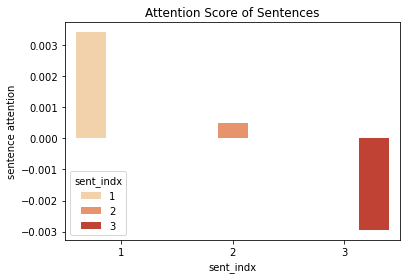

<Figure size 432x288 with 0 Axes>

In [117]:
classifer = nn_softmax[1]
classifer.to('cpu')
classifer.eval()
result, a_it, a_i, g_t = visualize_att(classifer, df_test, ind)

---

In [ ]:
orig_doc, x_s, g_t = get_test_sample(df_test, ind)
sig_out, a_it, a_i = classifer(x_s)

#    docs, doc_lengths, sent_lengths = x_s

# get attention values with the trained model
#  v, a_it, a_i = han_encoder(docs, doc_lengths, sent_lengths)

# get raw data
raw_sent = df_test.iloc[ind, :]['sent_org']
raw_sent_tok = [ okt.pos(elem) for elem in raw_sent ]
processed_raw = [ list(zip(*raw_sent_tok[i]))[0] for i in range(len(raw_sent_tok))]
processed_raw = [ list(i) for i in processed_raw] 
x = len(processed_raw)
y = max( [len(i) for i in processed_raw] )
update_att = np.zeros((x, y)).tolist()

# fill in word attentions
wd_atts = a_it.data.tolist()[0]
diff = y - len(wd_atts[0])
wd_atts = [ i + np.zeros(diff).tolist() for i in wd_atts ]

# update attention
for s, z in enumerate(zip(orig_doc, processed_raw)):
    cnt = 0
    for wd, val in enumerate(z[1]): 
        if val in z[0]:
            update_att[s][wd] = wd_atts[s][cnt]  
            cnt += 1

# Vosia;oze
words = processed_raw
sent_score = a_i.tolist()[0]
word_score = update_att# update_att.tolist()[0]
result = "<h2>Attention Visualization</h2>"
for sent, word_att, sent_att in zip(words, word_score, sent_score):
    result += map_sentence_to_color( sent, word_att, sent_att)


display(HTML(result))




In [ ]:
map_sentence_to_color( sent, word_att, sent_att)

In [ ]:
sentencemap = matplotlib.cm.get_cmap('Blues')
wordmap = matplotlib.cm.get_cmap('Blues')

words, scores, sent_score = sent, word_att, sent_att 

result = '<p><span style="margin:1px; padding:2px; background-color: {}">'\
   .format(matplotlib.colors.rgb2hex(sentencemap(sent_score)[:3]))
template = '<span class = "barcode"; style ="color: black; background-color: {}">{}</span>'
for word, score in zip(words, scores):
    color = matplotlib.colors.rgb2hex(wordmap(score)[:3])
    result += template.format(color, '&nbsp' + word + '&nbsp')
result += '</span><p>'

In [ ]:
def visualize_att(classifier, df_test, ind, random_st = 21 ):
    orig_doc, x_s, g_t = get_test_sample(df_test, ind)
    sig_out, a_it, a_i = classifier(x_s)
    
#    docs, doc_lengths, sent_lengths = x_s
    
    # get attention values with the trained model
  #  v, a_it, a_i = han_encoder(docs, doc_lengths, sent_lengths)
    
    # get raw data
    raw_sent = df_test.iloc[ind, :]['sent_org']
    raw_sent_tok = [ okt.pos(elem) for elem in raw_sent ]
    processed_raw = [ list(zip(*raw_sent_tok[i]))[0] for i in range(len(raw_sent_tok))]
    processed_raw = [ list(i) for i in processed_raw] 
    x = len(processed_raw)
    y = max( [len(i) for i in processed_raw] )
    update_att = np.zeros((x, y)).tolist()
    
    # fill in word attentions
    wd_atts = a_it.data.tolist()[0]
    diff = y - len(wd_atts[0])
    wd_atts = [ i + np.zeros(diff).tolist() for i in wd_atts ]
    
    # update attention
    for s, z in enumerate(zip(orig_doc, processed_raw)):
        cnt = 0
        for wd, val in enumerate(z[1]): 
            if val in z[0]:
                update_att[s][wd] = wd_atts[s][cnt]  
                cnt += 1
    
    # Vosia;oze
    words = processed_raw
    sent_score = a_i.tolist()[0]
    word_score = update_att# update_att.tolist()[0]
    result = "<h2>Attention Visualization</h2>"
    for sent, word_att, sent_att in zip(words, word_score, sent_score):
        result += map_sentence_to_color( sent, word_att, sent_att)

    display(HTML(result))

    with open(f'test_ind{ind}.html', 'w') as f:
        f.write(result)
    return result, a_it, a_i, g_t

---

In [ ]:
params_dict = {}
params_dict['batch_size'] = 4
#df_train, df_test = train_test_split(df_in)
dl1 = HanDataLoader(HAN_dataset(df_train), params_dict)
#han_dat = HAN_dataset(df_in)
sample_x_s = iter(dl1).__next__()
#x_s = get_x_s(sample_x_s)
#docs, doc_lengths, sent_lengths = x_s
docs, doc_lengths, sent_lengths = sample_x_s[0], sample_x_s[2], sample_x_s[3]

In [ ]:
embed_dim = 100
word_gru_h_dim = 100
word_gru_n_layers = 2
sent_gru_h_dim = 100
sent_gru_n_layers = 2
word_att_dim = 200
sent_att_dim = 200
dropval = 0.2
dropgru_s = 0.2
dropgru_w = 0.2

sent_gru = nn.GRU( 2 * word_gru_h_dim, sent_gru_h_dim, 
                                num_layers = sent_gru_n_layers, batch_first = True,
                                bidirectional = True, dropout = dropgru_s)
sent_layer_norm = nn.LayerNorm( 2 * sent_gru_h_dim, elementwise_affine= True)
sent_attention = nn.Linear(2 * sent_gru_h_dim, sent_att_dim)
sentence_context_vector = nn.Linear(sent_att_dim, 1, bias = False)

        # word
word_gru = nn.GRU(embed_dim, word_gru_h_dim, num_layers = word_gru_n_layers, 
                              batch_first = True, bidirectional = True, dropout = dropgru_w)
word_layer_norm = nn.LayerNorm( 2*word_gru_h_dim, elementwise_affine=True)
word_attention = nn.Linear( 2 * word_gru_h_dim, word_att_dim)
word_context_vector = nn.Linear(word_att_dim, 1, bias = False)
#word_context_vector = nn.Linear(word_att_dim, word_att_dim, bias = False)

In [ ]:
len(sample_x_s)

In [ ]:
#x_s = get_x_s(sample_x_s)
#docs, doc_lengths, sent_lengths = x_s
docs, doc_lengths, sent_lengths = sample_x_s[0], sample_x_s[2], sample_x_s[3]

In [ ]:
#1. Packing
## 1-1 reorder
doc_lengths, doc_perm_idx = doc_lengths.sort(dim = 0, descending = True)
docs = docs[doc_perm_idx]
sent_lengths = sent_lengths[doc_perm_idx]

## 1-2 packing
packed_sents = pack_padded_sequence(docs, lengths=doc_lengths.tolist(), batch_first = True)
packed_sent_lengths = pack_padded_sequence( sent_lengths, lengths= doc_lengths.tolist(), 
                                          batch_first=True)
valid_bsz_sent = packed_sents.batch_sizes

# 2. Word Attention
## 2-1. packing input data
sents, sent_lengths = packed_sents.data, packed_sent_lengths.data
# reorder
sent_lengths, sent_perm_idx = sent_lengths.sort(dim = 0, descending = True)
sents = sents[sent_perm_idx]

# embedding done already, do dropout
#sents = self.Dropout(sents)
packed_words = pack_padded_sequence( sents, lengths = sent_lengths.tolist(), batch_first=True)
valid_bsz_word = packed_words.batch_sizes

##2-2 NN
# hidden layer
h_it, _ = word_gru( packed_words )
h_it_normed = word_layer_norm(h_it.data)
h_it_pad, _ = pad_packed_sequence ( h_it, batch_first = True )
# attention module
u_it = torch.tanh( word_attention( h_it_normed.data ))
u_it_cv = word_context_vector( u_it ).squeeze(1)

## ATTENTION
key = u_it
query = u_it_cv 
cv_weight = word_context_vector.weight

alpha = 1
beta = 1

N_vec = -beta * abs(cv_weight - u_it)
N_vec = N_vec.sum(dim = 1, keepdim = True)

N_vec_pad, _ = pad_packed_sequence( PackedSequence(N_vec, valid_bsz_word), batch_first = True)
value_mask = (1 * (N_vec_pad != 0))
N_mean = torch.sum(N_vec_pad, 1) / sent_lengths.unsqueeze(1)

N_meaned = N_vec_pad - value_mask*N_mean.unsqueeze(2)

E_vec = alpha * torch.matmul( key, cv_weight.T )
E_vec_pad, _ = pad_packed_sequence( PackedSequence(E_vec, valid_bsz_word), batch_first = True)
E_mean = torch.sum(E_vec_pad, 1) / sent_lengths.unsqueeze(1)

E_meaned = E_vec_pad - value_mask*E_mean.unsqueeze(2)
A_it = torch.tanh( E_meaned ) * torch.sigmoid( N_meaned)
A_it = A_it.squeeze(2)

###########

s_i = ( h_it_pad * A_it.unsqueeze(2)).sum(dim = 1)

_, sent_unperm_idx = sent_perm_idx.sort(dim = 0, descending = False)
s_i = s_i[sent_unperm_idx] 
a_it = A_it[sent_unperm_idx] 

sents, word_att_weights = s_i, a_it
#sents = self.Dropout(sents)

# 3-1 NN
# hidden layer
h_i, _ = sent_gru(PackedSequence(sents, valid_bsz_sent))
h_i_normed = sent_layer_norm( h_i.data )
h_i_pad, _ = pad_packed_sequence( h_i, batch_first = True )

# context mapping
u_i = torch.tanh( sent_attention( h_i_normed.data ))

# calculate similarity
u_i_cv = sentence_context_vector(u_i).squeeze(1)

In [ ]:
u_i_cv

In [ ]:
key = u_i
query = sentence_context_vector.weight

alpha = 1
beta = 1

N_vec = -beta * abs(query - key)
N_vec = N_vec.sum(dim = 1, keepdim = True)

N_vec_pad, _ = pad_packed_sequence( PackedSequence(N_vec, valid_bsz_sent), batch_first = True)
value_mask = (1 * (N_vec_pad != 0))
N_mean = torch.sum(N_vec_pad, 1) / doc_lengths.unsqueeze(1)

N_meaned = N_vec_pad - value_mask*N_mean.unsqueeze(2)

E_vec = alpha * torch.matmul( key, query.T )
E_vec_pad, _ = pad_packed_sequence( PackedSequence(E_vec, valid_bsz_sent), batch_first = True)
E_mean = torch.sum(E_vec_pad, 1) / doc_lengths.unsqueeze(1)

E_meaned = E_vec_pad - value_mask*E_mean.unsqueeze(2)
A_i = torch.tanh( E_meaned ) * torch.sigmoid( N_meaned)
A_i = A_i.squeeze(2)

In [ ]:
v = ( h_i_pad * A_i.unsqueeze(2)).sum(dim = 1)

# 3-2 reorder
word_att_weights, _ = pad_packed_sequence( PackedSequence( word_att_weights, valid_bsz_sent), 
                                         batch_first = True)
_, doc_unperm_idx = doc_perm_idx.sort(dim = 0, descending = False)

# 4. Final Output
v = v[doc_unperm_idx] 
a_it = A_it[ doc_unperm_idx ] 
a_i = A_i[ doc_unperm_idx ]

In [ ]:
params_dict['attention'] = 'de_attention'

In [ ]:
han = ReviewHAN(params_dict)

In [ ]:
dl1 = HanDataLoader(HAN_dataset(df_train), params_dict)
sample_x_s = iter(dl1).__next__()

In [ ]:
docs, doc_lengths, sent_lengths = sample_x_s[0], sample_x_s[2], sample_x_s[3]

In [ ]:
sent_lengths

In [ ]:
v, a_it, a_i = han(docs, doc_lengths, sent_lengths)